# 情報活用講座：　ケモインフォマテックス 編　
# 第2回：　分子記述子編

## 底本
船津 公人、柴山 翔二郎 **『実践 マテリアルズインフォマティクス　Pythonによる材料設計のための機械学習』**、近代科学社、2020  
第一章　データに慣れよう

## 分子記述子とは

分子記述子(molecular descriptors)とは、分子の構造と物理的・化学的な特性の関係を数値化するための数値特徴量です。たとえば、分子量、極性、溶解度、融点、沸点、分子形状などが分子記述子の例です。単に記述子（ディスクリプター）とも称されます。記述子を使用することで分子の比較や機械学習モデルの構築に役立てることができます。

分子記述子は次の2つに大別されます。

* **実験的分子記述子**：　分配係数（LogP）、モル屈折率、双極子モーメント、分極率などの測定値
* **理論的分子記述子**：　分子骨格の有無や部分構造（フラグメント）などの分子の記号的表現

PythonのRDKitは、分子の特徴を数値で表すための様々な記述子を提供しています。以下にいくつかの代表的なRDKit記述子の一部を示します：

1. **溶解度関連記述子**：
   - LogP（分配係数）:  水分配係数で分子の疎水性を表す指標です。
   - TPSA（極性表面積）: 分子の極性を表す表面積の指標です。
   - MR（分子量の相対値）: 分子のサイズと形状を表す指標です。
   
2. **三次元形状関連記述子**：
   - 2D/3D相互情報量: 分子内の原子間距離と角度の統計的な特徴を表す指標です。
   - 融合リング数: 分子内の融合環の数を表す指標です。
   
3. **環境依存性関連記述子**：
   - 融合環間距離: 分子内の融合環の間の距離を表す指標です。
   - 局所原子密度: 分子内の原子の密度を表す指標です。
   
4. **構造関連記述子**：
   - 分子量: 分子の質量を表す指標です。
   - HBA（水素結合アクセプター）: 分子内の水素結合アクセプターの数を表す指標です。
   - HBD（水素結合ドナー）: 分子内の水素結合ドナーの数を表す指標です。

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Training/Training_python_4.git
%cd Training_python_4

## 1.　RDKit記述子

### RDKit記述子について

RDKitの`Descriptors`クラスは、化学的な分子の特性や記述子を計算するためのクラスです。このクラスは、RDKitライブラリの一部であり、分子の物理的、化学的、構造的な特性を数値で表現するための関数を提供します。これらの関数を使用すると、分子オブジェクトに対して特定の記述子を計算できます。RDKit記述子には以下のようなものがあります。

- `MolWt`: 分子量（molecular weight）を計算します。
- `TPSA`: Topological Polar Surface Areaを計算します。極性領域のサイズを表します。
- `NumRotatableBonds`: 回転可能結合の数を計算します。
- `NumHDonors`: 水素ドナーの数を計算します。
- `NumHAcceptors`: 水素アクセプターの数を計算します。
- `MolLogP`: 分配係数（partition coefficient）を計算します。

### 化合物の読み込み

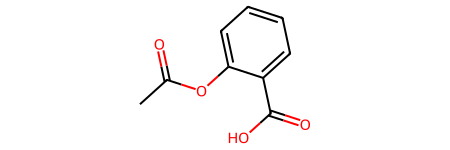

In [1]:
from rdkit import Chem
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
mol

### モジュールインポート  
RDKitには多くの記述子が用意されています。その記述子を取り出すのが`rdkit.Chem.Descriptors`モジュールにある`descList`です。 `descList`は、RDKitに組み込まれた様々な記述子のリストを含んでおり、分子量やフラグメントなどの209の項目（情報）を提供します。

In [2]:
from rdkit.Chem import Descriptors
len(Descriptors.descList)

209

In [3]:
names = list(dict(Descriptors.descList).keys())
names

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VS

descListにある項目はpythonのメソッド（関数）となっています。引数としてmolオブジェクトを加えることで記述子のvalueが返されます。次の３つ例は分子量、TPSA、回転可能な結合数を読み出しています。

In [4]:
mol_weight = Descriptors.MolWt(mol)
tpsa = Descriptors.TPSA(mol)
num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)

print("Molecular weight:", mol_weight)
print("TPSA:", tpsa)
print("Number of rotatable bonds:", num_rotatable_bonds)

Molecular weight: 180.15899999999996
TPSA: 63.60000000000001
Number of rotatable bonds: 2


この例では、SMILES文字列からRDKitの`Mol`オブジェクトを作成し、`Descriptors`クラスのメソッドを使用して分子記述子を計算しています。計算された分子記述子は、それぞれの変数に格納され、出力されます。

このように`Descriptors`クラスを使用することで、分子の特性や特性の比較に関する情報を数値として取得することができます。

## 2.　Morgan Fingerprint （底本：P17）

### Morgan Fingerprintについて

Morganフィンガープリント（または円環フィンガープリント）は、化学的な分子の特徴を表現するために使用される特徴ベクトルの一種です。これは、分子の構造に基づいて生成され、類似性の比較や機械学習モデルの学習など、さまざまな化学情報処理のタスクに利用されます。

Morganフィンガープリントは、化学反応における反応中心（反応性の高い部位）や周辺の環境情報をキャプチャするために開発されました。以下にMorganフィンガープリントの生成手順を簡単に説明します：

1. 分子内の各原子に一意の識別子（アトムID）を割り当てます。
2. 指定された半径（デフォルトでは2）の範囲内に存在する原子や結合の組み合わせを考慮して、分子内の部分構造（サブグラフ）を特定します。
3. 各サブグラフに対して、ハッシュ関数を使用して一意のフィンガープリントビット（ビットベクトル）を生成します。
4. フィンガープリントビットは、各サブグラフが存在するかどうかに基づいて設定されます。

Morganフィンガープリントの特徴は、分子内の構造に対する局所的な情報を取得する能力にあります。指定された半径内の原子や結合の組み合わせを考慮することで、化学的な類似性や反応性の特徴を反映したフィンガープリントが生成されます。

Morganフィンガープリントは、分子の類似性の計算や分類、回帰、クラスタリング、バーチャルスクリーニングなど、さまざまな化学情報処理のタスクに使用されます。また、機械学習モデルの学習において、分子の特徴ベクトルとして入力されることもあります。

### 化合物の読み込み

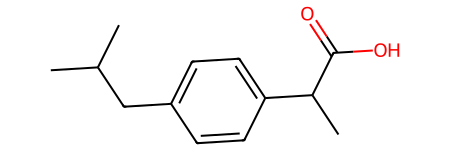

In [5]:
from rdkit import Chem
# イブプロフェン
smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"
ibuprofen = Chem.MolFromSmiles(smiles)
ibuprofen

### モジュールインポート  
RDKitのrdkit.Chem.AllChemモジュールに含まれている`GetMorganFingerprintAsBitVect`は、分子のMorganフィンガープリント（または円環フィンガープリント）を取得するための関数です。

In [6]:
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

In [7]:
# Morganフィンガープリントの取得
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(ibuprofen,
                                                    radius=2,
                                                    bitInfo=bi)

`bi`変数には、`(atom_index, radius)`が格納されている

【解説】`GetMorganFingerprintAsBitVect`関数  

この関数は、RDKitの化学モジュールである`rdkit.Chem.AllChem`から提供されています。以下のように使用されます：

```python
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('CCO')  # SMILES表記から分子を作成

# Morganフィンガープリントの取得
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
```

引数として指定する主なパラメータは次のとおりです：

- `mol`: RDKitの分子オブジェクト（`rdkit.Chem.rdchem.Mol`型）。
- `radius`: フィンガープリントの半径（デフォルト値は2）。この値が大きいほど、より大域的な構造情報が含まれるフィンガープリントが生成されます。
- `nBits`: ビットベクトルのサイズ（デフォルト値は2048）。この値は生成されるフィンガープリントの次元数を表します。

関数の呼び出しにより、指定された半径とビット数のMorganフィンガープリントが取得されます。フィンガープリントはRDKitの`rdkit.DataStructs.ExplicitBitVect`オブジェクトとして返され、化学的な構造の特徴をビットベクトルとして表現します。各ビットは、特定の化学的な特徴（例：部分構造）の存在を示します。



### ビットベクトルのオンビットの確認

In [8]:
on_bits = list(fp.GetOnBits())
print(on_bits)

[1, 79, 80, 283, 310, 389, 650, 807, 854, 857, 900, 921, 955, 1057, 1146, 1257, 1365, 1380, 1750, 1754, 1844, 1847, 1853, 1873, 1917]


【解説】`GetOnBits()`関数について  

RDKitの`GetOnBits()`は、RDKitのフィンガープリント（例：Morganフィンガープリント）のビットベクトルにおいて、セットされている（1となっている）ビットのインデックスを返す関数です。

`GetOnBits()`は、RDKitの`rdkit.DataStructs.ExplicitBitVect`オブジェクト上で呼び出されます。以下に例を示します：

```python
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('CCO')  # SMILES表記から分子を作成

# Morganフィンガープリントの取得
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# セットされているビットのインデックスを取得
on_bits = list(fp.GetOnBits())
print(on_bits)
```

`GetOnBits()`関数を呼び出すことで、セットされているビットのインデックスがリストとして返されます。このリストには、フィンガープリントのビットベクトルで1となっているビットの位置が含まれます。

上記の例では、Morganフィンガープリントを計算し、`GetOnBits()`関数を使用してセットされているビットのインデックスを取得しています。取得されたインデックスを出力することで、セットされているビットの位置を確認できます。

`GetOnBits()`関数を使用することで、フィンガープリントの特徴を解析したり、特定のビットの情報を取得したりすることができます。

### Morgan fingerprintを色付表示

RDKit 2019.09 以上のバージョンでは、`Draw.DrawMorganBit`を利用しましょう

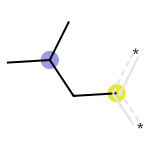

In [9]:
#図1.6(a)　Morganフィンガープリントのid854

from rdkit.Chem import Draw
Draw.DrawMorganBit(ibuprofen, 854,bi)

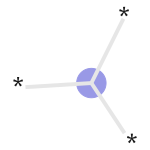

In [10]:
Draw.DrawMorganBit(ibuprofen, 1,bi)

In [11]:
list(bi.items())[:10]

[(1, ((1, 0), (10, 0))),
 (79, ((3, 1),)),
 (80, ((3, 0),)),
 (283, ((0, 1), (2, 1), (11, 1))),
 (310, ((5, 2), (9, 2))),
 (389, ((14, 1),)),
 (650, ((13, 0),)),
 (807, ((12, 0), (14, 0))),
 (854, ((1, 2),)),
 (857, ((4, 2),))]

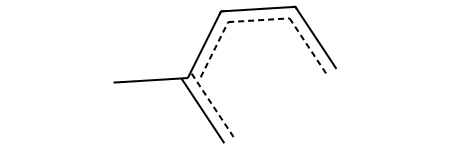

In [12]:
atom_id, radius = bi[310][0]
path_ids = Chem.FindAtomEnvironmentOfRadiusN(ibuprofen, radius, atom_id)
substructure = Chem.PathToSubmol(ibuprofen, path_ids)
substructure

### Morgan fingerprintが分子の中のどこを指しているか確認する

`Mol.GetSubstructMatch`を利用する

substructure cccc(c)C


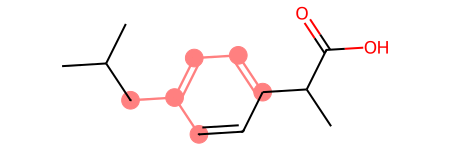

In [13]:
print('substructure', Chem.MolToSmiles(substructure))
ibuprofen.GetSubstructMatch(substructure)
ibuprofen

In [14]:
atom_index, radius = bi[854][0]
print('atom_index', atom_index, 'radius', radius)

atom_index 1 radius 2


### RDKit fingerprintの取得と可視化

In [15]:
from pprint import pprint 
rdkbi = {}
rdkfp = Chem.RDKFingerprint(ibuprofen, maxPath=5, bitInfo=rdkbi)
pprint(list(rdkbi.items())[:10])
list(rdkfp.GetOnBits())[:10]

[(19, [[0, 2, 3, 14, 1], [0, 2, 3, 4, 1]]),
 (103,
  [[4, 5, 6, 7],
   [4, 5, 6, 14],
   [4, 5, 14, 8],
   [4, 14, 8, 7],
   [5, 6, 7, 8],
   [6, 7, 8, 14]]),
 (105, [[5, 6, 9, 11, 13], [7, 8, 9, 11, 13]]),
 (110, [[9, 11, 12, 10]]),
 (161, [[4, 5, 6], [4, 5, 14], [4, 14, 8], [5, 6, 7], [6, 7, 8], [7, 8, 14]]),
 (173, [[0, 2, 1]]),
 (194,
  [[4, 5, 6, 7],
   [4, 5, 6, 14],
   [4, 5, 14, 8],
   [4, 14, 8, 7],
   [5, 6, 7, 8],
   [6, 7, 8, 14]]),
 (254, [[9, 11, 13]]),
 (261, [[9, 11, 12]]),
 (294, [[4, 5], [4, 14], [5, 6], [6, 7], [7, 8], [8, 14]])]


[19, 103, 105, 110, 161, 173, 194, 254, 261, 294]

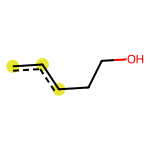

In [16]:
Draw.DrawRDKitBit(ibuprofen, 105, rdkbi)

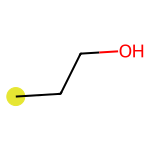

In [17]:
Draw.DrawRDKitBit(ibuprofen, 254, rdkbi)

## 考察例
- Morgan fingerprintは、原子から同心円状に結合をたどって行きます。
- 一方でRDKit fingerprintでは、直線的な部分構造を取り出すようです。
- `rdkbi`では、部分構造に含まれる結合のidが取り出されています。

# 次回
https://colab.research.google.com/github/ARIM-Training/Training_python_4/blob/main/%E7%AC%AC3%E5%9B%9E_%E9%A1%9E%E4%BC%BC%E5%BA%A6%E8%A8%88%E7%AE%97%E3%81%A8%E6%AC%A1%E5%85%83%E5%89%8A%E6%B8%9B.ipynb